In [1]:
import pandas as pd
import os
path = os.getcwd()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

In [2]:
path = 'C:\\Users\\sunil\\Projects\\Machine Hack\\Merchandise Popularity Prediction\\Dataset'

In [3]:
train = pd.read_csv(path + '\\Train.csv')
test = pd.read_csv(path + '\\Test.csv')
sample_sub = pd.read_csv(path + '\\sample_submission.csv')

In [4]:
train

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944000,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900000,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931000,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000000,0.1090,0.0677,109.560,186507,3
...,...,...,...,...,...,...,...,...,...,...,...,...
18203,0.403,0.28100,6,-10.365,0,0.4540,0.000000,0.1060,0.1820,112.881,232880,4
18204,0.481,0.01140,4,-26.196,1,0.9910,0.967000,0.0985,0.3430,57.748,155500,4
18205,0.168,0.00908,5,-33.966,0,0.9470,0.946000,0.1250,0.3960,68.775,172500,4
18206,0.598,0.65800,1,-7.159,0,0.3890,0.000000,0.5820,0.4730,106.807,152558,4


---
# Hypothesis genration

1. 

---
# Exploratory Data Analysis

Lets go and explore our training and test datasets. We will do the following steps:

1. Brief Look at the Dataset
2. See the shape of Dataset. Variables and Target column
3. Target Distribution
4. See the variables datatypes
5. See The Number/Percentage Of Missing values
6. Unique Values in each Variable

**1. Brief Look at the Dataset**

In [5]:
train.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Ratio,18208.0,0.544283,0.202709,0.000000,0.411000,0.573000,0.69900,0.998
Basket_Ratio,18208.0,0.483585,0.302010,0.000216,0.200000,0.517000,0.74200,1.000
Category_1,18208.0,5.155536,3.535068,0.000000,2.000000,5.000000,8.00000,11.000
Store_Score,18208.0,-12.198086,8.370566,-47.576000,-16.496250,-9.166500,-5.94375,-0.079
Category_2,18208.0,0.648506,0.477450,0.000000,0.000000,1.000000,1.00000,1.000
Store_Presence,18208.0,0.477702,0.380634,0.000000,0.086175,0.430000,0.89500,0.996
Score_1,18208.0,0.322109,0.413493,0.000000,0.000001,0.002245,0.85900,1.000
Score_2,18208.0,0.164888,0.136531,0.011900,0.095300,0.112000,0.17600,0.991
Score_3,18208.0,0.421440,0.271922,0.000000,0.184750,0.393000,0.64000,0.999
Score_4,18208.0,115.305776,31.478303,0.000000,90.974250,114.022500,134.99700,219.701


In [7]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Ratio,12140.0,0.543776,0.200109,0.000,0.414750,0.57000,0.69600,0.978
Basket_Ratio,12140.0,0.488879,0.301217,0.000,0.213000,0.52100,0.74500,1.000
Category_1,12140.0,5.121417,3.528765,0.000,2.000000,5.00000,8.00000,11.000
Store_Score,12140.0,-12.062847,8.300385,-46.847,-16.066000,-9.04650,-5.89175,0.662
Category_2,12140.0,0.642916,0.479160,0.000,0.000000,1.00000,1.00000,1.000
Store_Presence,12140.0,0.474675,0.377582,0.000,0.087775,0.43050,0.88200,0.996
Score_1,12140.0,0.321641,0.414438,0.000,0.000001,0.00205,0.86100,1.000
Score_2,12140.0,0.165942,0.139109,0.000,0.095900,0.11200,0.17325,0.994
Score_3,12140.0,0.420485,0.270508,0.000,0.190000,0.39200,0.63300,1.000
Score_4,12140.0,115.748041,31.519999,0.000,90.908750,114.61850,135.82925,219.701


**2. See the shape of Dataset. Variables and Target column**

In [8]:
print(f'shape of Train is {train.shape}')
print(f'shape of Test is {test.shape}')

target = 'popularity'

features = [col for col in train.columns if col not in [target]]

shape of Train is (18208, 12)
shape of Test is (12140, 11)


**3. Target Distribution**

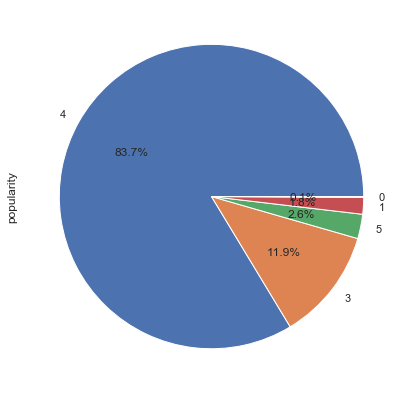

In [9]:
plt.figure(figsize = (7,7))
train[target].value_counts().plot.pie(autopct='%1.1f%%')

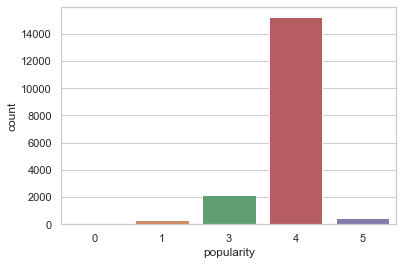

In [10]:
sns.countplot(train[target])

**4. See the Variable Datatypes**

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


**5. See The Number/Percentage Of Missing values**

In [12]:
train.isna().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

In [13]:
pd.concat((train.nunique(), test.nunique()),axis = 1)

,0,1
Store_Ratio,1053,1010.0
Basket_Ratio,1993,1811.0
Category_1,12,12.0
Store_Score,10758,8300.0
Category_2,2,2.0
Store_Presence,2832,2507.0
Score_1,3668,3064.0
Score_2,1385,1275.0
Score_3,1591,1491.0
Score_4,12943,9463.0


---
# Univariate Analysis

In [14]:
cat_cols = ['Category_1', 'Category_2']
num_cols = [col for col in features if col not in cat_cols]

**Pie Plots for Categorical Variables**

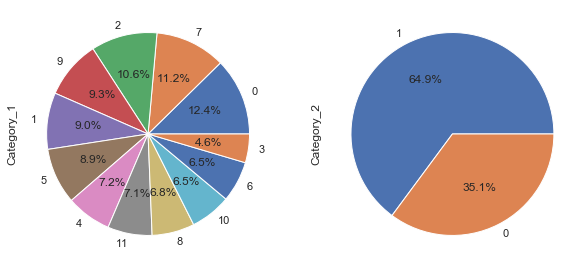

In [15]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))
axx = ax.flatten()

for i,col in enumerate(cat_cols):
    train[col].value_counts().plot(kind = 'pie', autopct='%1.1f%%', ax = axx[i])

**Countplots for Categorical Variables**

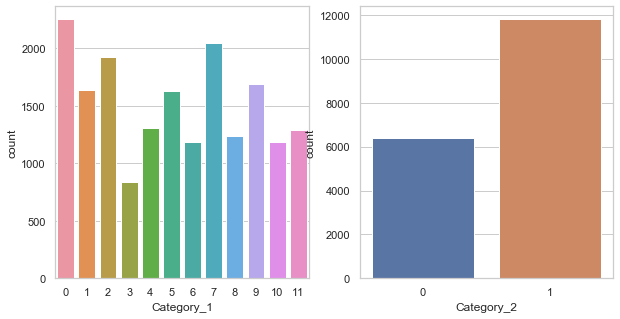

In [16]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))
axx = ax.flatten()

for i,col in enumerate(cat_cols):
    sns.countplot(train[col], ax = axx[i])

**Distplot for Numerical Variables**

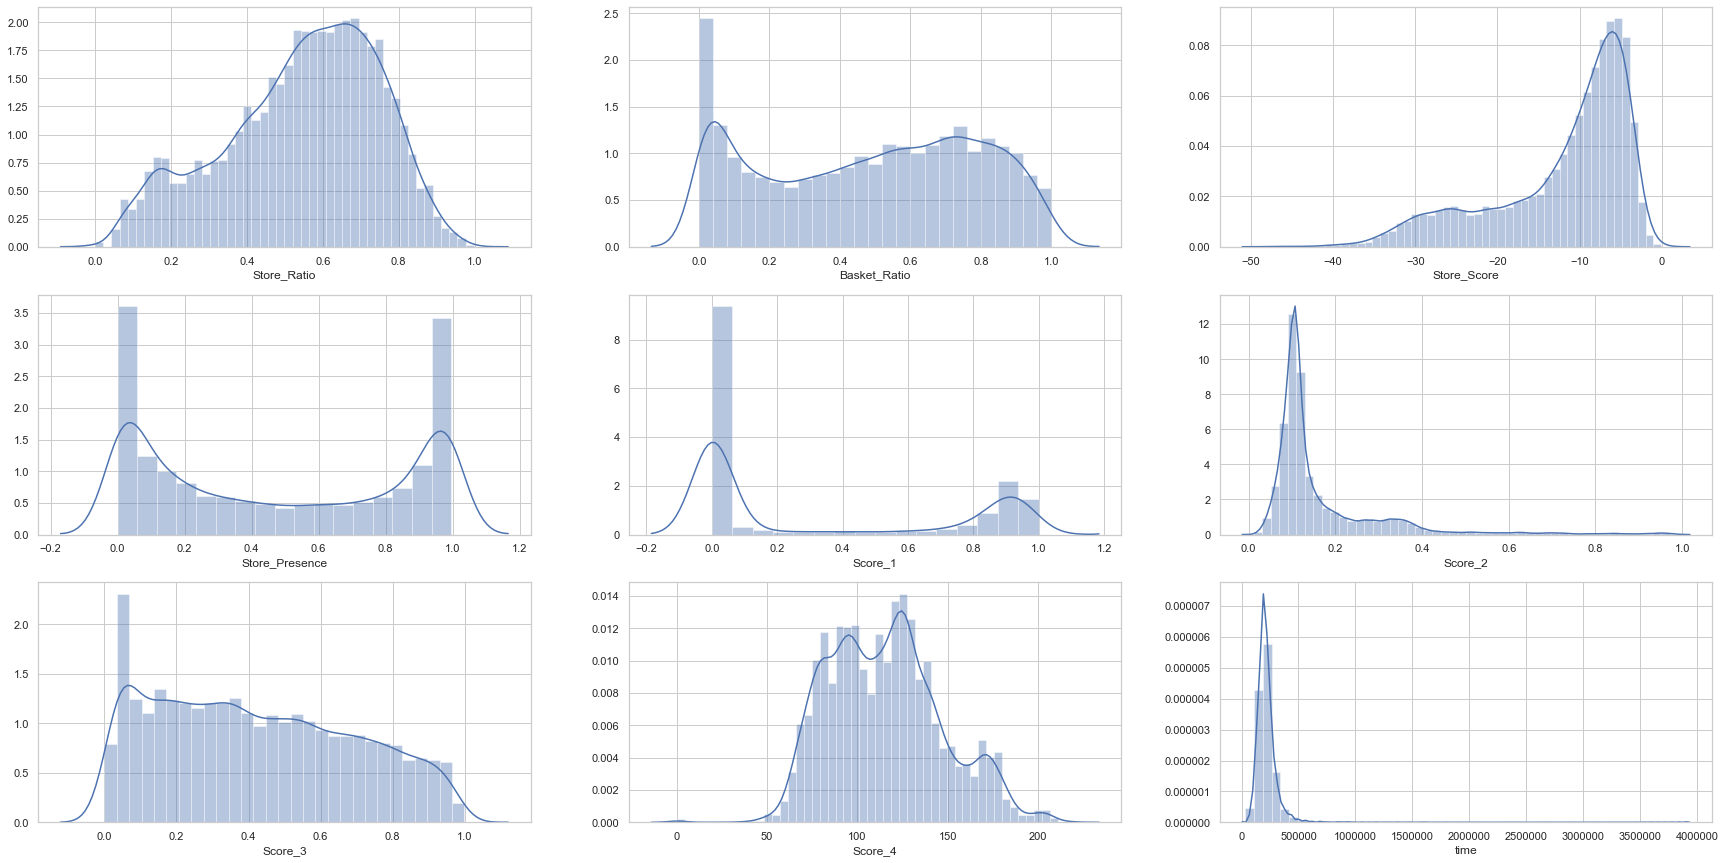

In [17]:
f, ax = plt.subplots(3, 3, figsize = (30, 15))
axx = ax.flatten()

for i,col in enumerate(num_cols):
    sns.distplot(train[col], ax=axx[i])

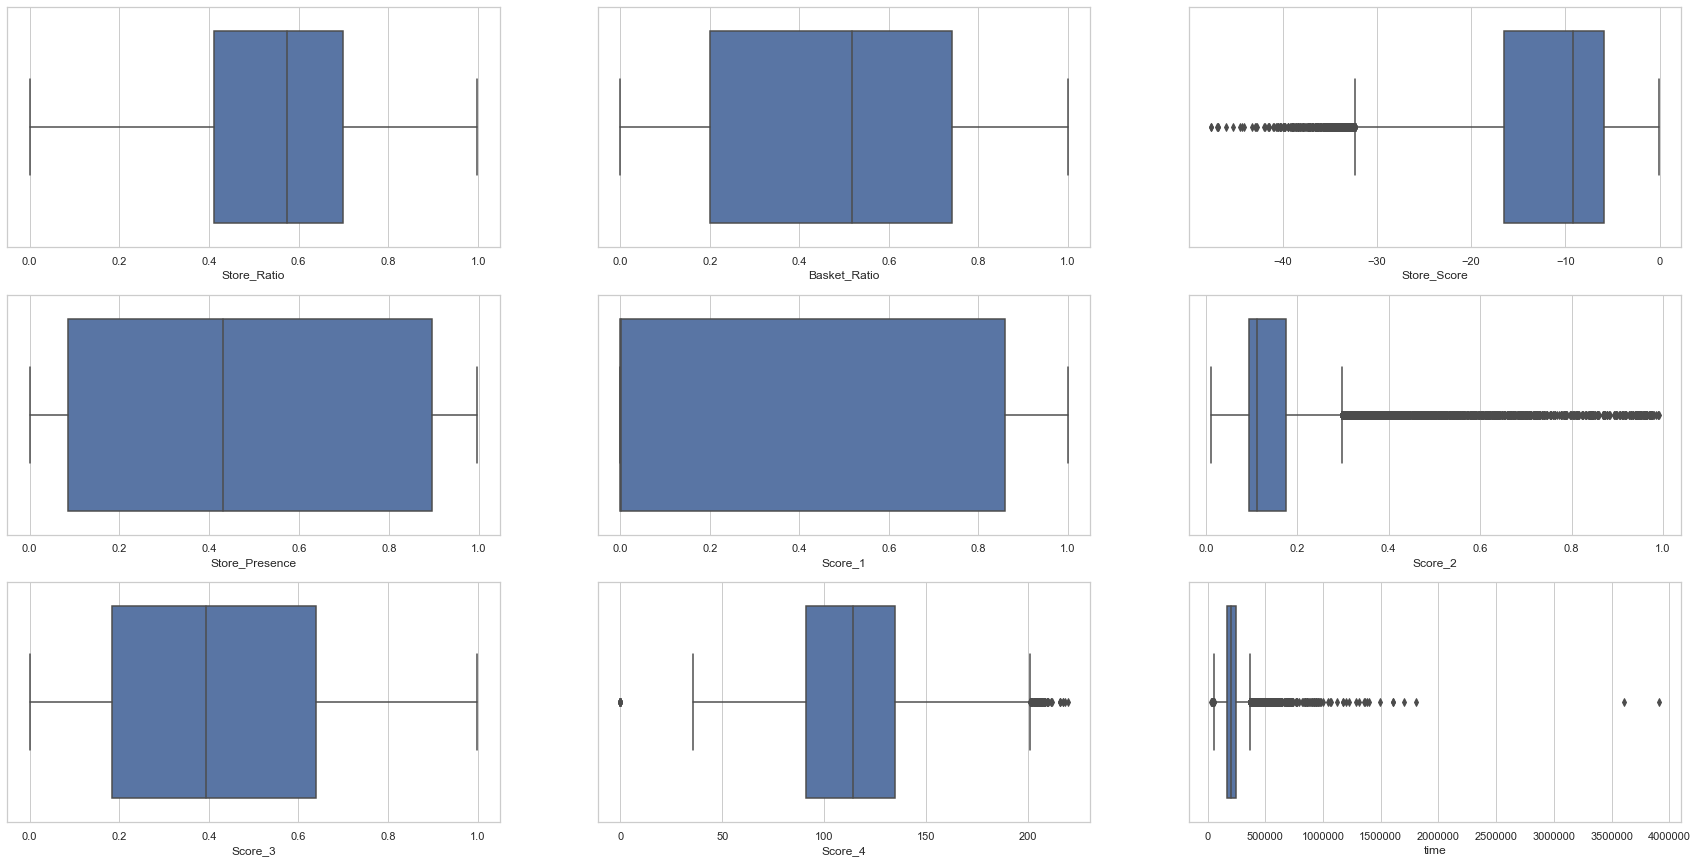

In [18]:
f, ax = plt.subplots(3, 3, figsize = (30, 15))
axx = ax.flatten()

for i,col in enumerate(num_cols):
    sns.boxplot(train[col], ax=axx[i])

# Bivariate Analysis

**Categorical Variables with Target**

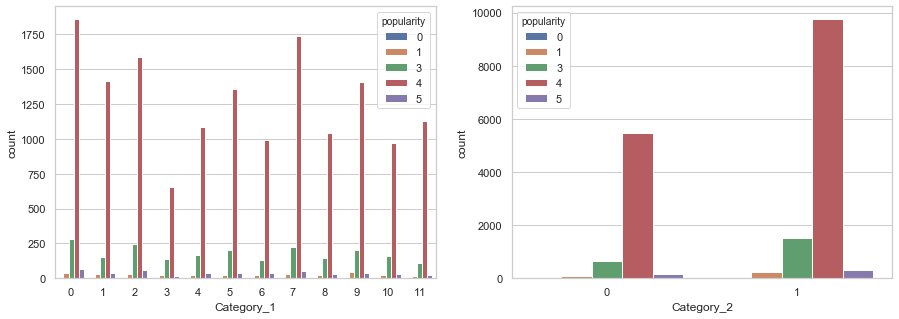

In [26]:
f,ax = plt.subplots(1, 2, figsize=(15,5))
axx = ax.flatten()
#train.groupby('Category_1')[target].value_counts().plot.pie(autopct='%1.1f%%', ax = axx[0])
#train.groupby('Category_2')[target].value_counts().plot.pie(autopct='%1.1f%%', ax = axx[1])

sns.countplot(train['Category_1'], hue = train[target], ax = axx[0])
sns.countplot(train['Category_2'], hue = train[target], ax = axx[1])

# Important Insights

Popularity is 0 when Store_Ration is 0.

**Numerical Variables With Target**

C:\Users\sunil\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sunil\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sunil\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


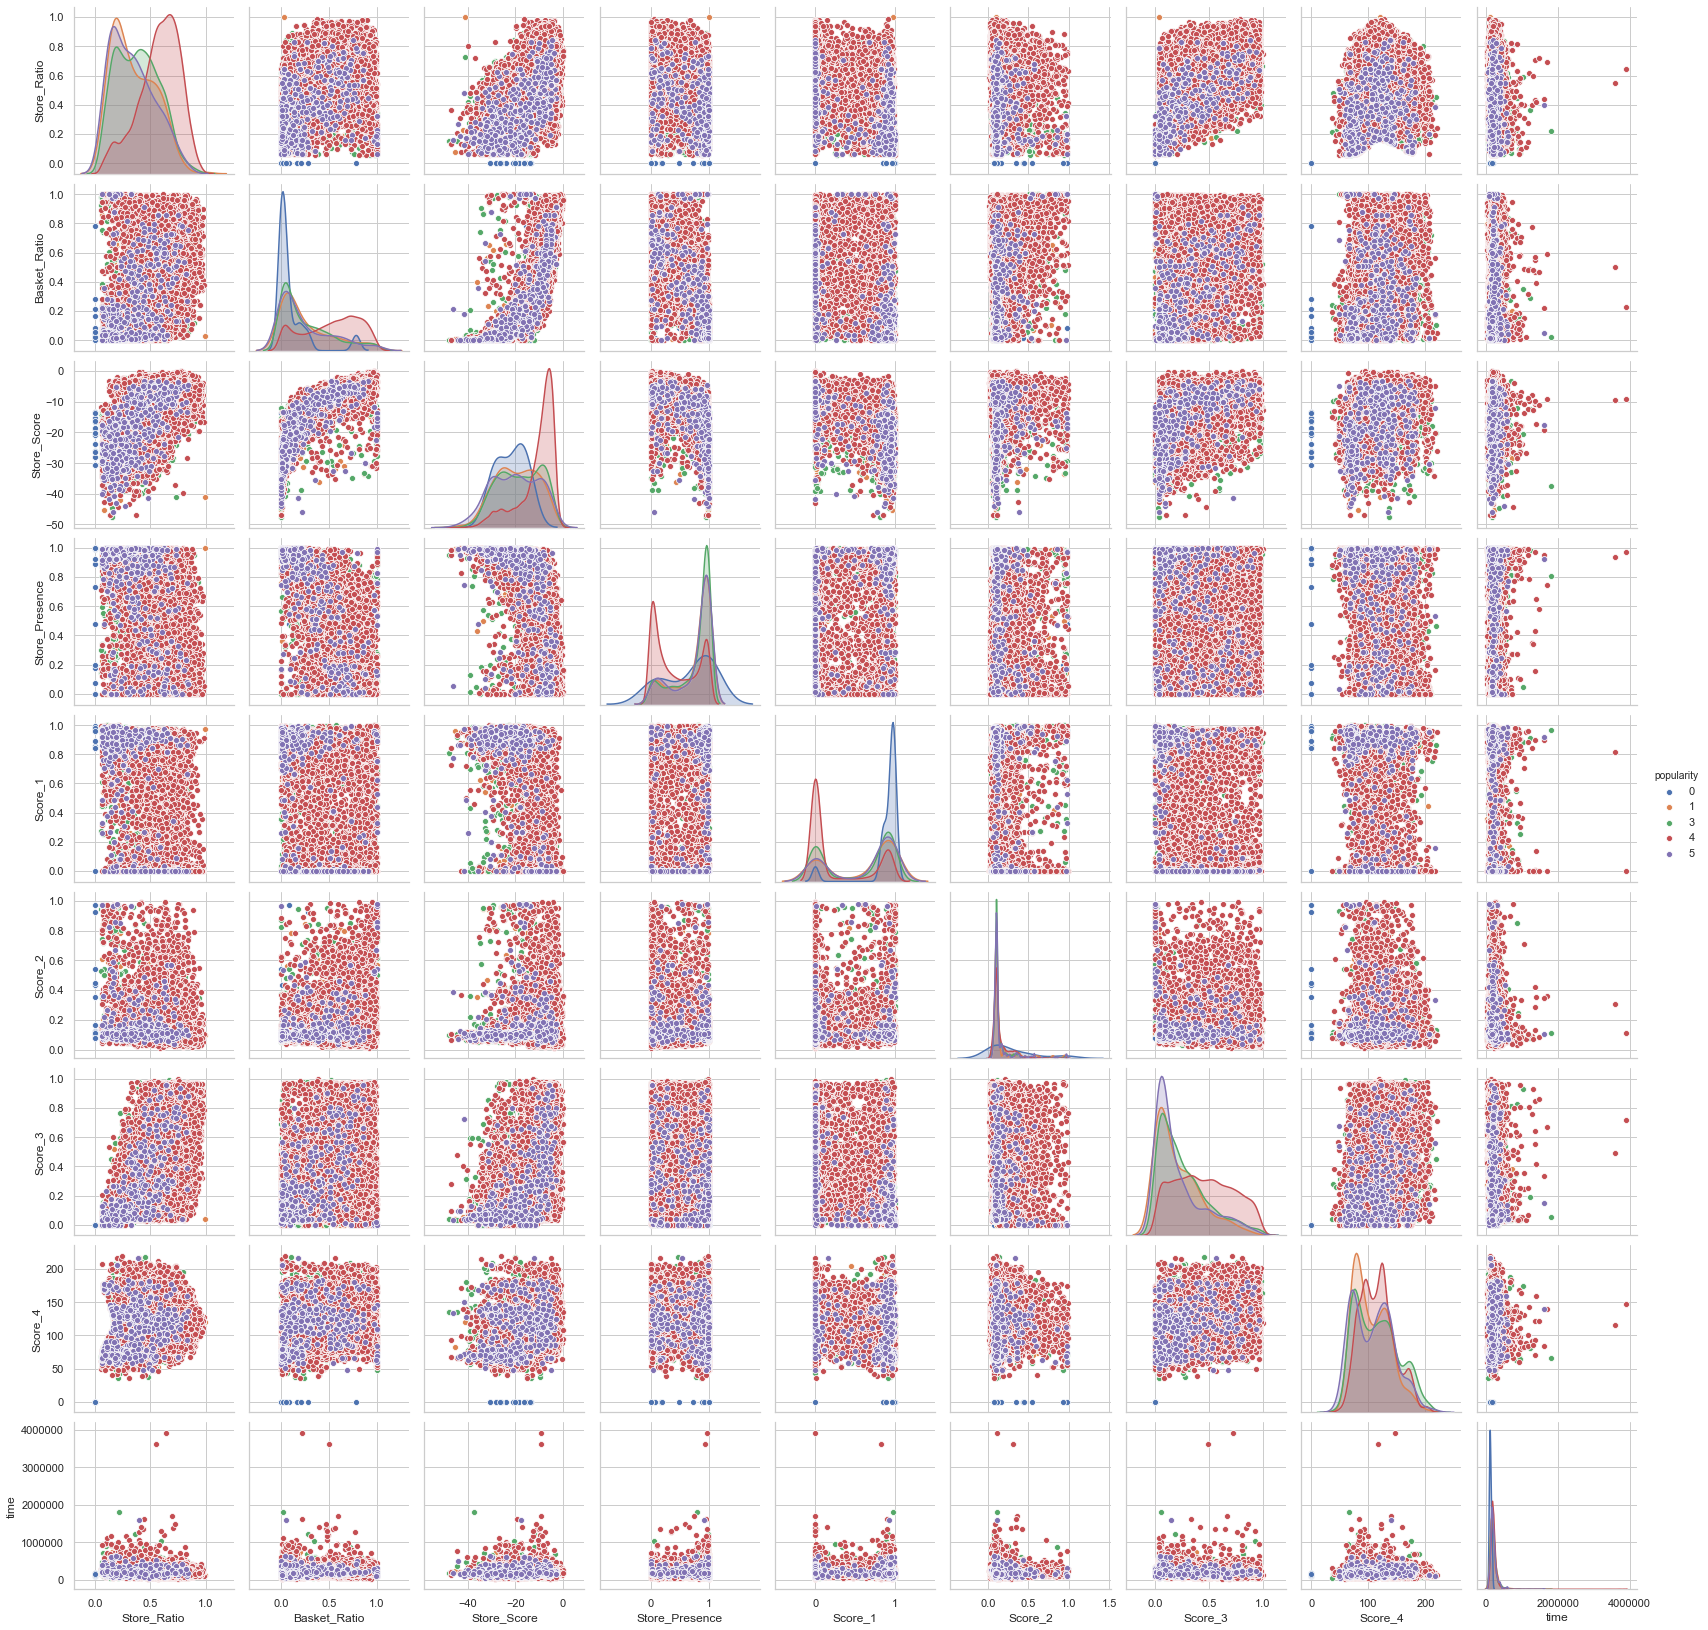

In [54]:
sns.pairplot(data = train, x_vars=num_cols, y_vars=num_cols,hue = target)

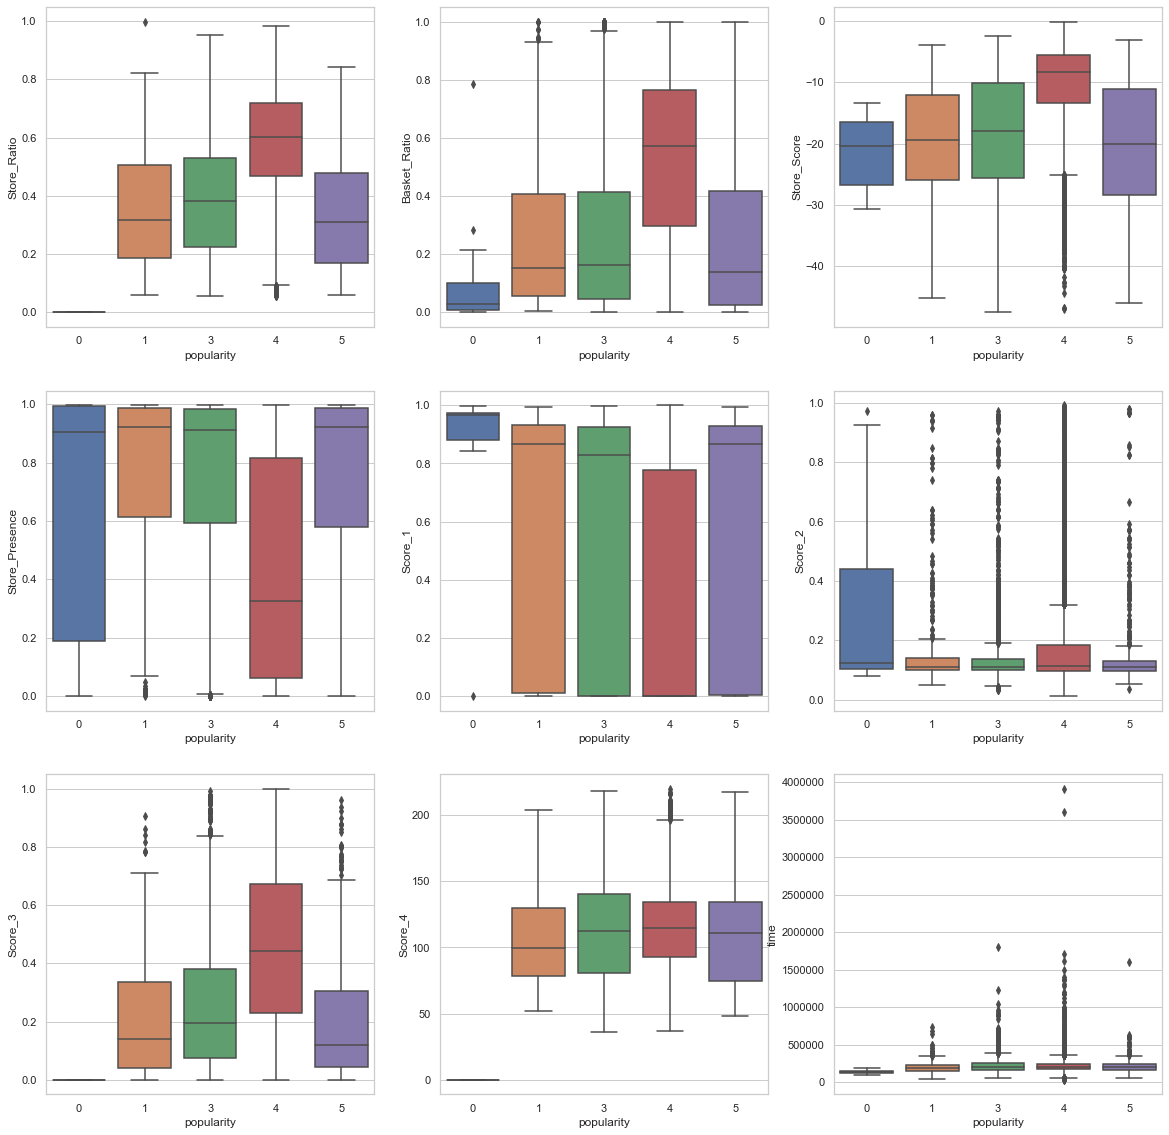

In [59]:
f, ax = plt.subplots(3, 3, figsize = (20, 20))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.boxplot(data = train, y = col, x = target, ax = axx[index])

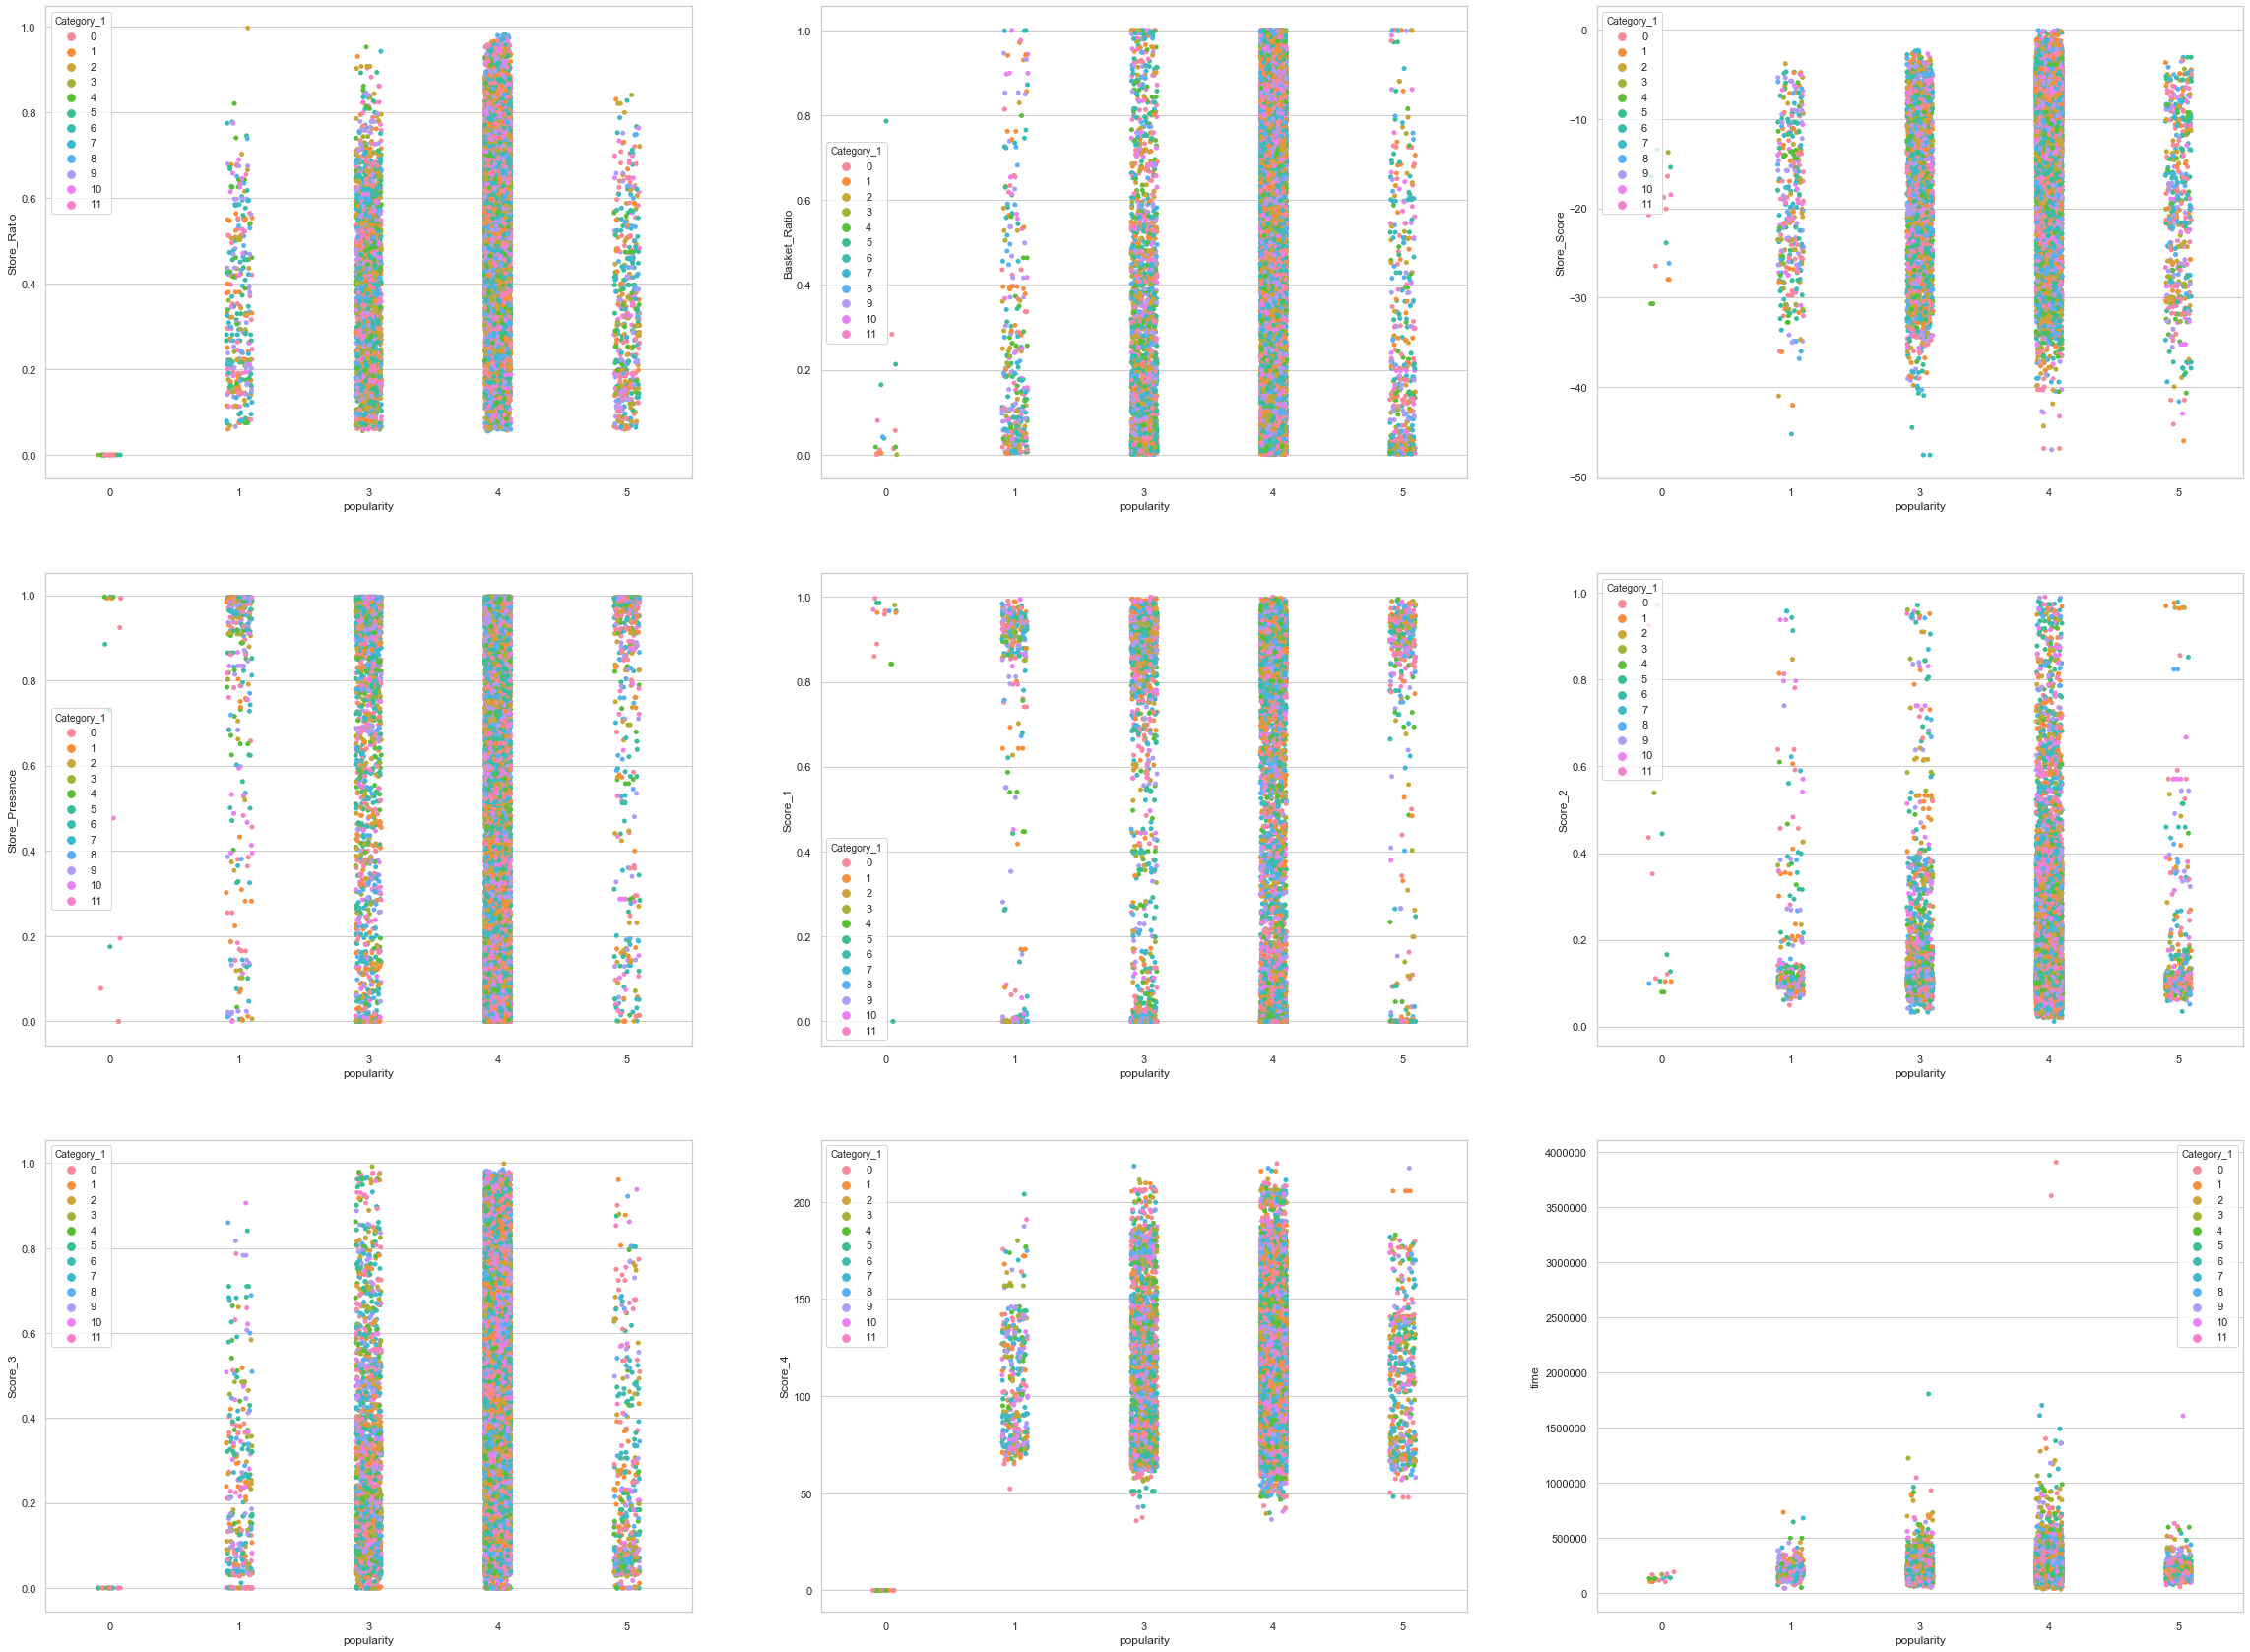

In [64]:
f, ax = plt.subplots(3, 3, figsize = (40, 30))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.stripplot(x = target, y = col, data = train,ax = axx[index], hue = 'Category_1')

#sns.catplot(x = target, y = 'Trip_Distance', data = train, hue = 'Type_of_Cab')